Required libraries and necessary changes for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:20,.10f}'.format

- We have train and test datasets. For EDA step, we used "train.csv" dataset which assigned dataframe as "train".
- Removed "belongs_to_collection", "homepage", "spoken_languages", "poster_path" columns from train dataset and created new column which name is "percentage_change".
- In this assignment, we try to predict the "revenue" value with looking the "percentage_change" range.

In [2]:
train = pd.read_csv("train.csv")
train.drop(columns=["belongs_to_collection", "homepage", "spoken_languages", "poster_path"], inplace=True)
train["percentage_change"] = (train.revenue - train.budget) / train.budget
train.loc[train.percentage_change == np.inf, "percentage_change"] = 0.0

Basic information of "train" dataset.

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
id                      3000 non-null int64
budget                  3000 non-null int64
genres                  2993 non-null object
imdb_id                 3000 non-null object
original_language       3000 non-null object
original_title          3000 non-null object
overview                2992 non-null object
popularity              3000 non-null float64
production_companies    2844 non-null object
production_countries    2945 non-null object
release_date            3000 non-null object
runtime                 2998 non-null float64
status                  3000 non-null object
tagline                 2403 non-null object
title                   3000 non-null object
Keywords                2724 non-null object
cast                    2987 non-null object
crew                    2984 non-null object
revenue                 3000 non-null int64
percentage_change       3000 non-null f

First 5 rows of "train" dataset

In [118]:
len(train.loc[(train.production_companies.isna()) & (train.original_language == "en") & (train.budget != 0)])

53

In [112]:
(train.head())

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,percentage_change,release_date1,Q_x,genres_new,production_companies_new,production_countries_new
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000000000,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-0.1203820714,2015-02-20,1,Comedy,Paramount Pictures ; United Artists ; Met...,US United States of America
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.2488950000,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0000000000,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1.3787358750,2004-08-06,3,Comedy; Drama; Family; Romance,Walt Disney Pictures,US United States of America
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.2999900000,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0000000000,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2.9672727273,2014-10-10,4,Drama,Bold Films ; Blumhouse Productions ; Righ...,US United States of America
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.1749360000,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0000000000,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,12.3333333333,2012-03-09,1,Thriller; Drama,NaN,IN India
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.1480700000,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0000000000,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.0000000000,2009-02-05,1,Action; Thriller,NaN,KR South Korea


# BUDGET vs REVENUE

We download all plot into folder. This is the parent path of folder.

In [5]:
save_path = "/Users/pelingundogdu/Desktop/A4_poster/01_jupyter_output/"

"graph_basic" and "graph_detail" are defined function. These functions help us when we plot "budget" and "revenue" features.

In [230]:
def graph_basic(col, title, color, xlabel):
    plt.figure(figsize=(18,5),  dpi=100)
    ax = plt.gca()
    train[col].hist(bins=150, color=color, ax=ax)
    xticks = ax.get_xticks().tolist()
    xticks = [str(int(i/1_000_000)) for i in xticks ]
    ax.set_xticklabels(xticks, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_xlabel(xlabel+" (MM)", fontsize=14)
    plt.title(title, fontsize=18)
    ax.grid(False)
    ax.grid(which='major', axis='y', linestyle='--');
    
def graph_detail(col, title, upto, color, xlabel):
    plt.figure(figsize=(18,5),  dpi=100)
    ax = plt.gca()
    train[col].hist(bins=150, color=color, ax=ax)
    plt.xlim(0, upto)
    plt.xticks(np.arange(0, upto, 5_000_000))
    xticks = ax.get_xticks().tolist()
    xticks = [str(int(i/1_000_000)) for i in xticks ]
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_xticklabels(xticks,fontsize=12)
    ax.set_xlabel(xlabel+" (MM)",fontsize=14)
    plt.title(title, fontsize=18)
    ax.grid(False)
    ax.grid(which='major', axis='y', linestyle='--');

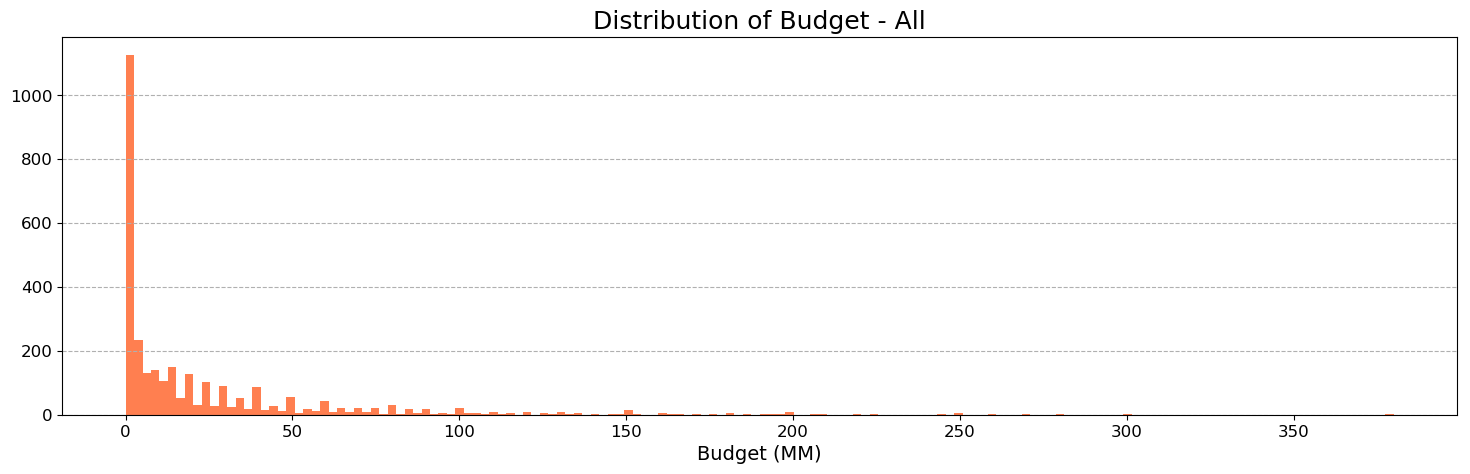

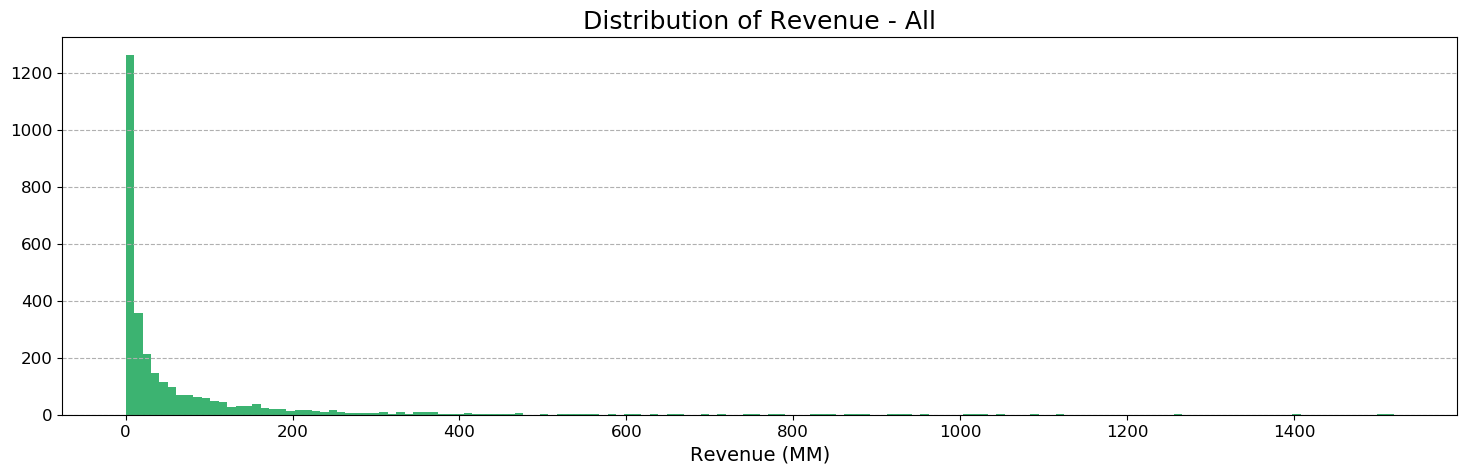

In [231]:
budget_4 = graph_basic("budget", "Distribution of Budget - All", "#FF7F50", "Budget")
plt.savefig(save_path + '4_budget.jpg', format='jpg', dpi=200)
graph_basic("revenue", "Distribution of Revenue - All", "#3CB371", "Revenue")
plt.savefig(save_path + '4_revenue.jpg', format='jpg', dpi=200)

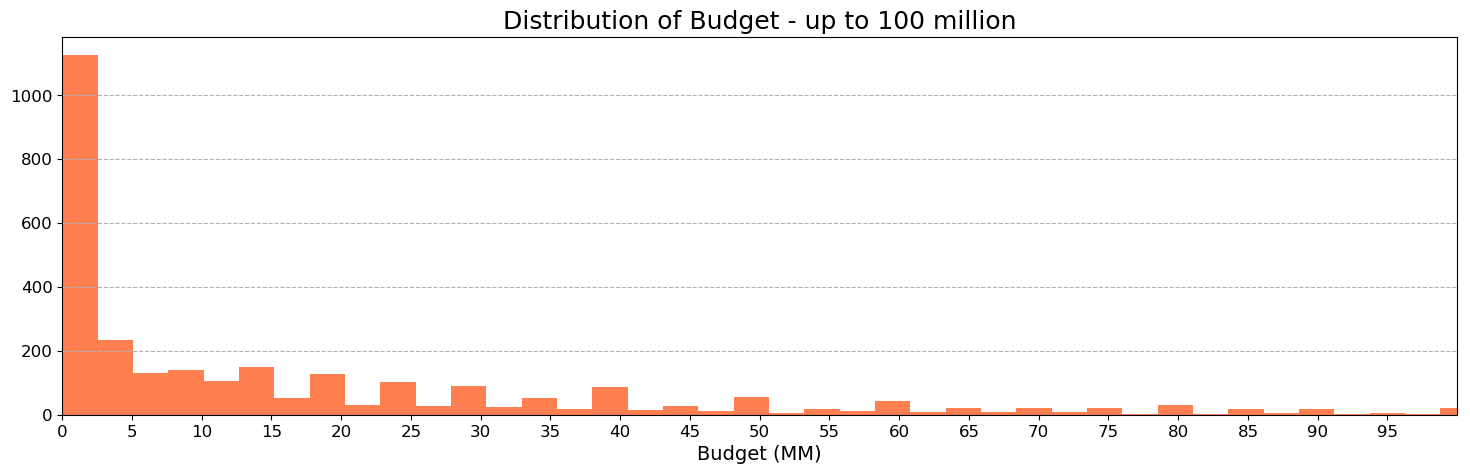

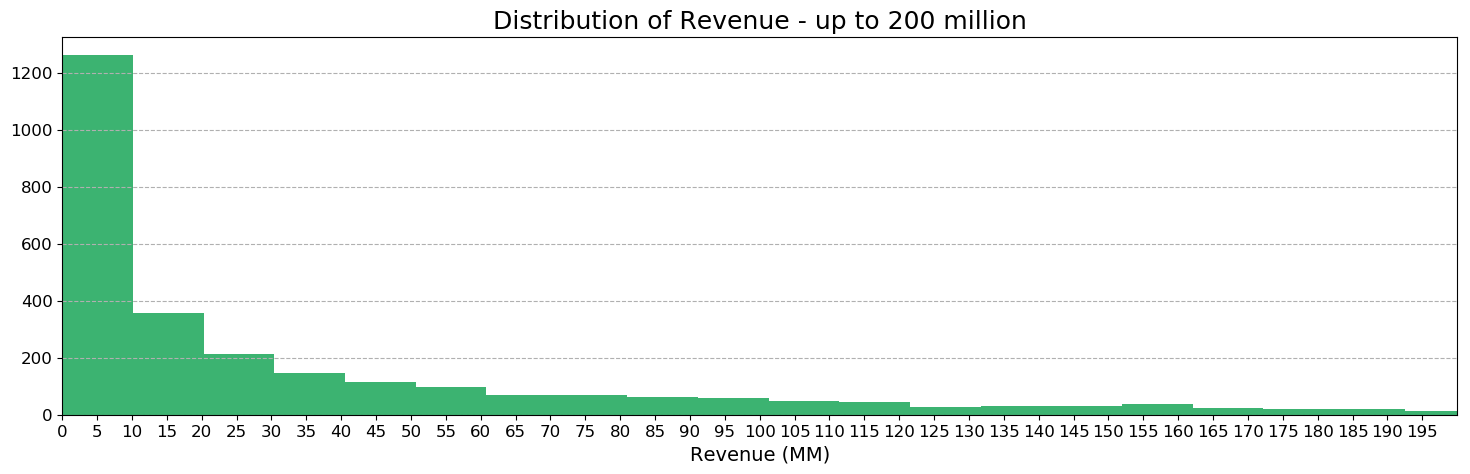

In [232]:
graph_detail("budget", "Distribution of Budget - up to 100 million", upto=100_000_000, color="#FF7F50", xlabel="Budget")
plt.savefig(save_path + '5_budget.jpg', format='jpg', dpi=200)
graph_detail("revenue", "Distribution of Revenue - up to 200 million", upto=200_000_000, color="#3CB371", xlabel="Revenue")
plt.savefig(save_path + '5_revenue.jpg', format='jpg', dpi=200)

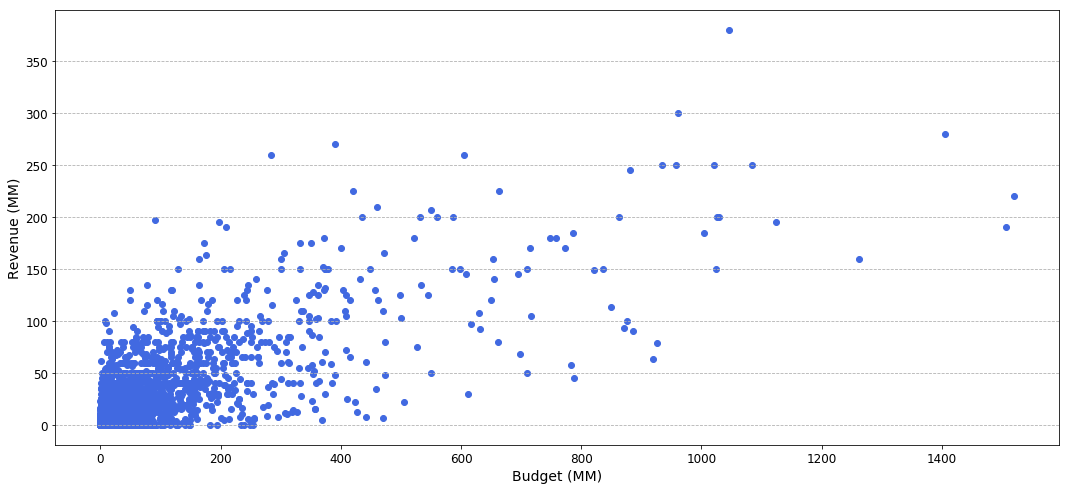

In [228]:
fig, ax = plt.subplots(figsize=(18,8))
plt.scatter(x=train.revenue, y=train.budget, c="#4169E1");

xticks = ax.get_xticks().tolist()
xticks = [str(int(i/1_000_000)) for i in xticks ]
ax.set_xticklabels(xticks,  fontsize=12)
ax.set_xlabel("Budget (MM)", fontsize=14)

yticks = ax.get_yticks().tolist()
yticks = [str(int(i/1_000_000)) for i in yticks ]
ax.set_yticklabels(yticks,  fontsize=12)
ax.set_ylabel("Revenue (MM)", fontsize=14)

ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--');
plt.savefig(save_path + '6_1_budget_vs_revenue_overview.jpg', format='jpg', dpi=200)

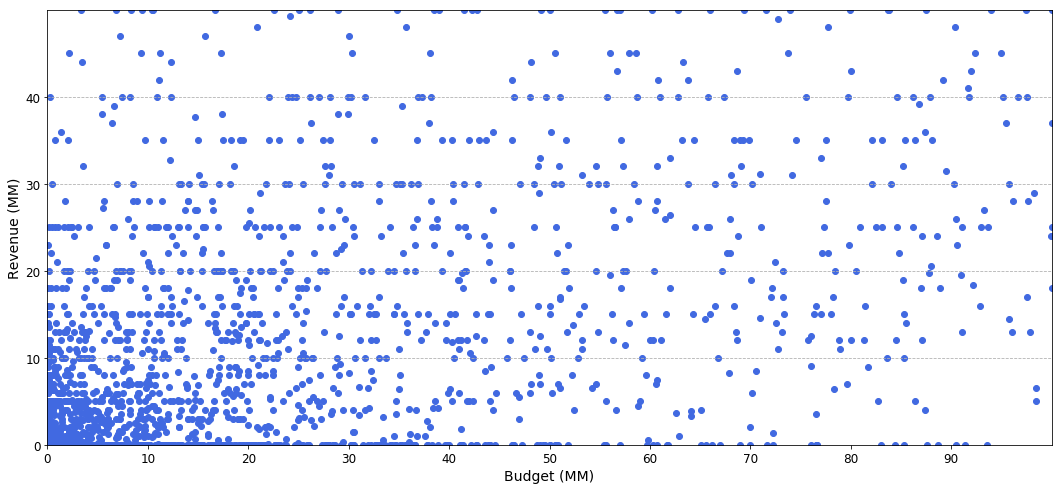

In [229]:
fig, ax = plt.subplots(figsize=(18,8))
plt.scatter(x=train.revenue, y=train.budget, c="#4169E1");
plt.xlim(0, 100_000_000)
plt.xticks(np.arange(0, 100_000_000, 10_000_000))
plt.ylim(0, 50_000_000)
plt.yticks(np.arange(0, 50_000_000, 10_000_000))

xticks = ax.get_xticks().tolist()
xticks = [str(int(i/1_000_000)) for i in xticks ]
ax.set_xticklabels(xticks, fontsize=12)
ax.set_xlabel("Budget (MM)", fontsize=14)

yticks = ax.get_yticks().tolist()
yticks = [str(int(i/1_000_000)) for i in yticks ]
ax.set_yticklabels(yticks, fontsize=12)
ax.set_ylabel("Revenue (MM)", fontsize=14)

ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--');
plt.savefig(save_path + '6_2_budget_vs_revenue_overview_detail.jpg', format='jpg', dpi=200)

# BUDGET - REVENUE - LANGUAGE

In this section, we are looking the percentages of the required features based on language values. "get_percentage" function helps us to get the percentage of specific features based on language value.

In [11]:
def get_percentage(df_temp, col, col_name):
    df_temp = df_temp.sort_values(by=col)
    df_temp = df_temp.reset_index()
    df_temp.loc[df_temp.original_language != "en", "original_language"] = "Other"
    df_temp.loc[df_temp.original_language == "en", "original_language"] = "English"
    df_temp = df_temp.groupby("original_language").sum()
    df_temp[col_name] = df_temp[col] * 100/ df_temp[col].sum()
    return df_temp

In [12]:
graph_language = pd.DataFrame(train.groupby("original_language").size(), columns=["count"])
graph_language = get_percentage(graph_language, "count", "percentage of count")
print(graph_language)
graph_budget = pd.DataFrame(train.groupby("original_language")["budget"].sum())
graph_budget = get_percentage(graph_budget, "budget", "percentage of budget")
print(graph_budget)
graph_revenue = pd.DataFrame(train.groupby("original_language")["revenue"].sum())
graph_revenue = get_percentage(graph_revenue, "revenue", "percentage of revenue")
print(graph_revenue)

                   count  percentage of count
original_language                            
English             2575        85.8333333333
Other                425        14.1666666667
                        budget  percentage of budget
original_language                                   
English            65275256226         96.5695978577
Other               2318746104          3.4304021423
                        revenue  percentage of revenue
original_language                                     
English            192264714932          96.0470889418
Other                7912840734           3.9529110582


In [13]:
graph_df = pd.merge(graph_language, graph_budget, how="inner", on="original_language").merge(graph_revenue, how="inner", on="original_language")
graph_df

,count,percentage of count,budget,percentage of budget,revenue,percentage of revenue
original_language,,,,,,
English,2575,85.8333333333,65275256226,96.5695978577,192264714932,96.0470889418
Other,425,14.1666666667,2318746104,3.4304021423,7912840734,3.9529110582


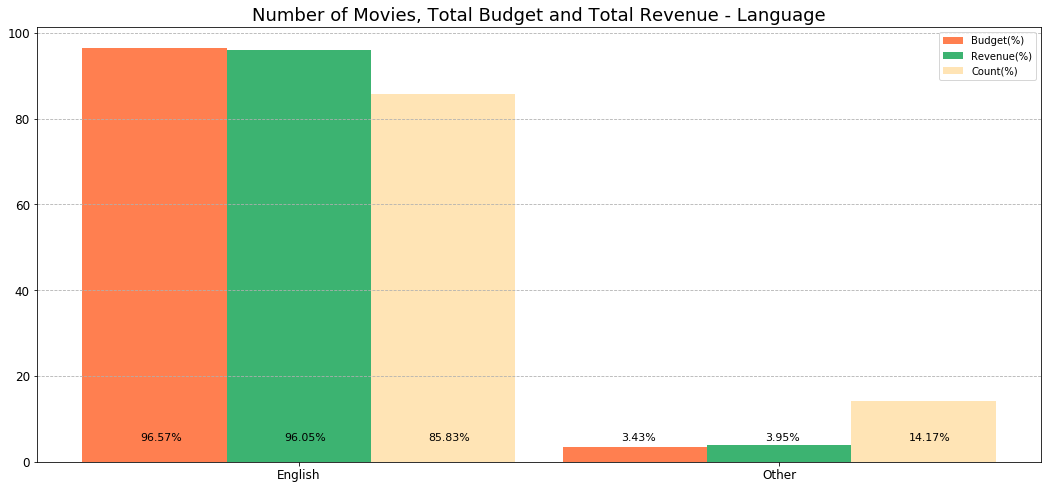

In [29]:
fig, ax = plt.subplots(figsize=(18,8))
ind = np.arange(2) 
width = 0.3

ax.bar(ind, graph_df["percentage of budget"], width, color='#FF7F50')
labels = graph_df["percentage of budget"]
for i,j in enumerate(labels):
    ax.text(i - 0.03 , 5, str('{:0.2f}%'.format(j)), color='black', fontweight='regular', fontsize=11)

ax.bar(ind+width, graph_df["percentage of revenue"], width, color='#3CB371')
labels = graph_df["percentage of revenue"]
for i,j in enumerate(labels):
    ax.text(i + width - 0.03 , 5, str('{:0.2f}%'.format(j)), color='black', fontweight='regular', fontsize=11)

ax.bar(ind+width*2, graph_df["percentage of count"], width, color='#FFE4B5')
labels = graph_df["percentage of count"]
for i,j in enumerate(labels):
    ax.text(i + width*2 - 0.03 , 5, str('{:0.2f}%'.format(j)), color='black', fontweight='regular', fontsize=11)

ax.set_xticks(ind + width)
ax.set_xticklabels((graph_df.index[0], graph_df.index[1]), fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--');

plt.title("Number of Movies, Total Budget and Total Revenue - Language", fontsize=18)
plt.legend(["Budget(%)", "Revenue(%)", "Count(%)"]);
plt.savefig(save_path + '7_languagebased_budget_revenue_count.jpg', format='jpg', dpi=200)

# DATE-BASED GRAPH

In [15]:
train.describe()

,id,budget,popularity,runtime,revenue,percentage_change
count,"3,000.0000000000","3,000.0000000000","3,000.0000000000","2,998.0000000000","3,000.0000000000","3,000.0000000000"
mean,"1,500.5000000000","22,531,334.1099999994",8.4632741997,107.8565710474,"66,725,851.8886666670","4,923.3297719579"
std,866.1697293256,"37,026,086.4119874388",12.1040000346,22.0864344286,"137,532,326.3360183239","174,990.6485489811"
min,1.0000000000,0.0000000000,0.0000010000,0.0000000000,1.0000000000,-0.9999994783
25%,750.7500000000,0.0000000000,4.0180527500,94.0000000000,"2,379,808.2500000000",0.0000000000
50%,"1,500.5000000000","8,000,000.0000000000",7.3748615000,104.0000000000,"16,807,068.0000000000",0.0714120784
75%,"2,250.2500000000","29,000,000.0000000000",10.8909830000,118.0000000000,"68,919,203.5000000000",2.0982895931
max,"3,000.0000000000","380,000,000.0000000000",294.3370370000,338.0000000000,"1,519,557,910.0000000000","8,499,999.0000000000"


In this section, we are going to look the "release_date" feature detail. For this;
- we need to convert our "release_date" feature into datetime format. we cannot used to datetime format function directly becuase of the inadequacy of datetime library. In our dataset, there are several movies which are released before 1968. If we use datetime library function, we are seeing these years which are less than 1968 as 2067,2065, etc. That's why we created if else sentence to convert the "release_Date" feature into datetime.

In [16]:
dc = train.release_date.str.rsplit("/", expand=True).astype(int)
date_list =[]
for i in range(0,len(dc)):
    if (dc[2][i]>19) & (dc[2][i]<69):
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-19"+str(dc[2][i])
        date_list.append(new_date)
    elif(dc[2][i]>=69):
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-19"+str(dc[2][i])
        date_list.append(new_date)
    elif(dc[2][i]<10):
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-200"+str(dc[2][i])
        date_list.append(new_date)
    else:
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-20"+str(dc[2][i])
        date_list.append(new_date)
    
train["release_date1"] = pd.DataFrame(date_list)

- we are going to look quarterly. That's why we created new column which shows each movies' quarter information.

In [17]:
train['release_date1'] = train['release_date1'].astype('datetime64[ns]')
train["Q_x"] = train["release_date1"].dt.quarter

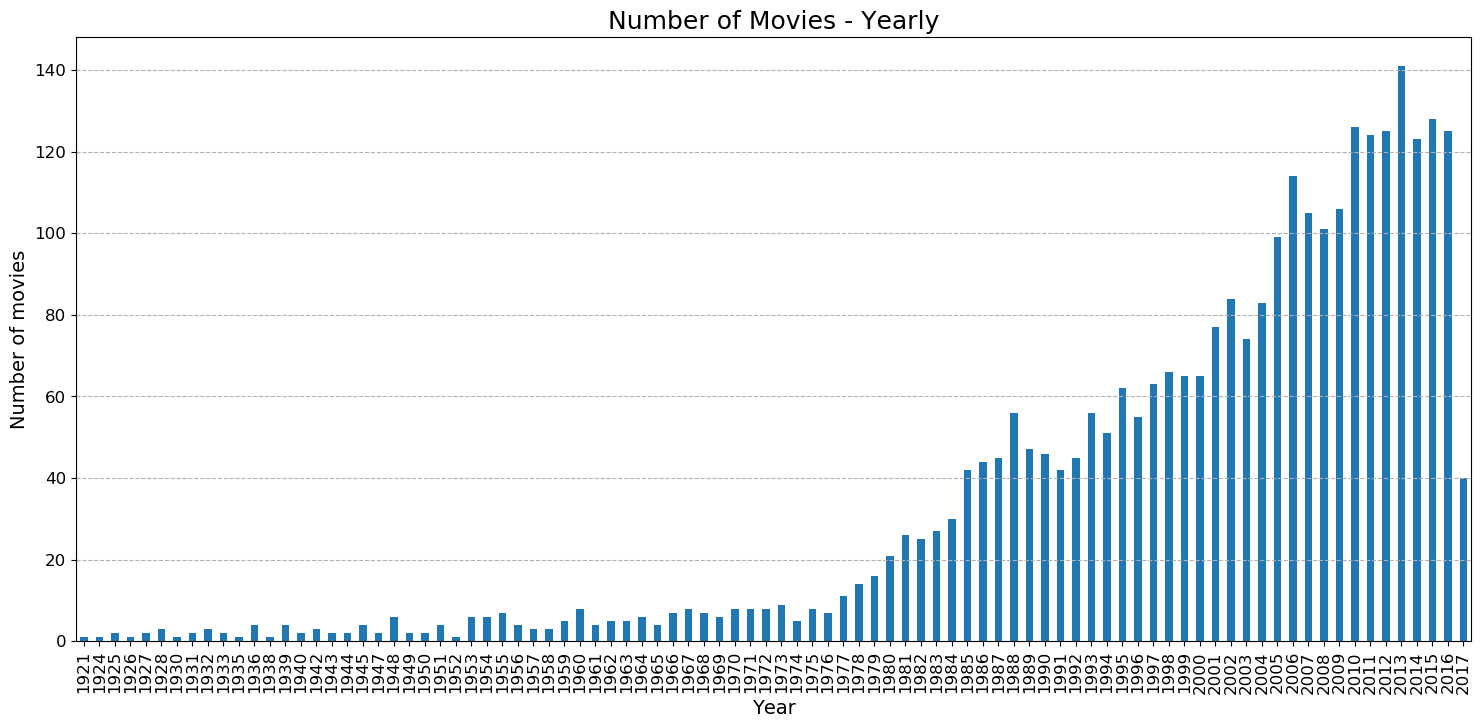

In [18]:
plt.figure(figsize=(18,8),  dpi=100)
ax = plt.gca()
pd.DataFrame(train["release_date1"].dt.to_period("Y")).groupby("release_date1").size().plot(kind="bar");
plt.title("Number of Movies - Yearly", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of movies", fontsize=14);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--');
plt.savefig(save_path + '8_1_rd_year.jpg', format='jpg', dpi=200)

In [235]:
train.groupby("Q_x")["revenue"].mean()

Q_x
1   54,384,015.0088757426
2   91,877,185.1515580714
3   52,296,895.9673518762
4   69,910,411.9317319840
Name: revenue, dtype: float64

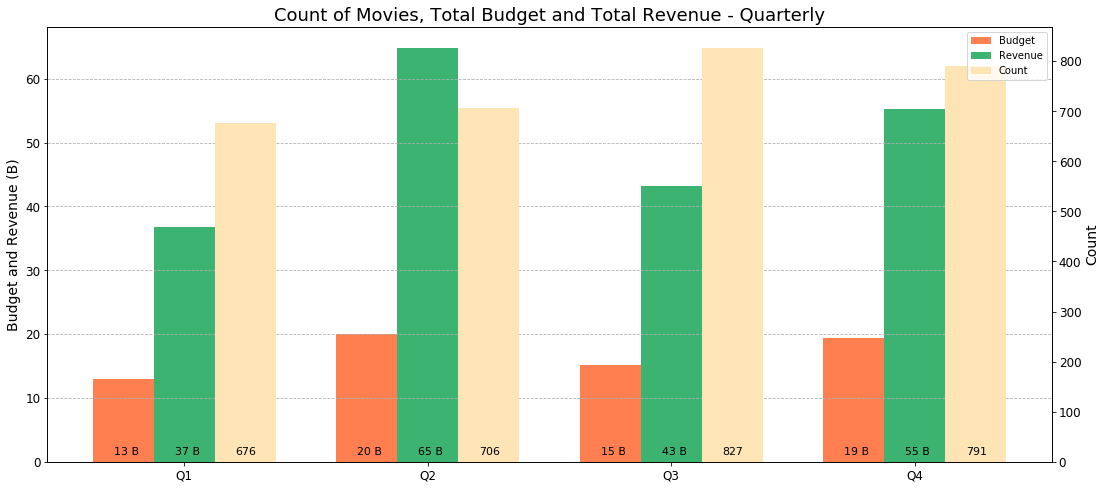

In [241]:
fig, ax = plt.subplots(figsize=(18,8))
ind = np.arange(4) 
width = 0.25

ax.bar(ind, train.groupby("Q_x")["budget"].sum(), width, color='#FF7F50')
ax.bar(ind+width, train.groupby("Q_x")["revenue"].sum(), width, color='#3CB371')
#ax.set_yticklabels(np.arange(0, 70, 10))

yticks = ax.get_yticks().tolist()
yticks = [str(int(i/1_000_000_000)) for i in yticks ]
yticks[-1] = ''
ax.set_yticklabels(yticks,fontsize=12)

ax.set_ylabel("Budget and Revenue (B)", fontsize=14)

ax1 = ax.twinx()

ax1.bar(ind+width*2, pd.DataFrame(train["release_date1"].dt.quarter).groupby("release_date1").size(), width, color='#FFE4B5')
labels = pd.DataFrame(train["release_date1"].dt.quarter).groupby("release_date1").size()
for i,j in enumerate(labels):
    ax1.text(i + width*2 - 0.04 , 15, str(j), color='black', fontweight='regular', fontsize=11)

labels = train.groupby("Q_x")["budget"].sum()
for i,j in enumerate(labels):
    ax1.text(i - 0.04 , 15, str('%d B'%round(j/1_000_000_000)), color='black', fontweight='regular', fontsize=11)

labels = train.groupby("Q_x")["revenue"].sum()
for i,j in enumerate(labels):
    ax1.text(i + width - 0.04, 15, str('%d B'%round(j/1_000_000_000)), color='black', fontweight='regular', fontsize=11)

ax1.set_ylabel("Count", fontsize=14)

ax.set_xticks(ind + width)
ax.set_xticklabels(["Q"+str(i) for i in set(train["Q_x"]) ], fontsize=12)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--');
plt.yticks(fontsize=12)
plt.title("Count of Movies, Total Budget and Total Revenue - Quarterly", fontsize=18)
fig.legend(["Budget", "Revenue", "Count"], loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes);
plt.savefig(save_path + '8_2_rd_quarterly.jpg', format='jpg', dpi=200)

# GENRES

In [20]:
train.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,percentage_change,release_date1,Q_x
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000000000,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-0.1203820714,2015-02-20,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.2488950000,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0000000000,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1.3787358750,2004-08-06,3
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.2999900000,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0000000000,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2.9672727273,2014-10-10,4
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.1749360000,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0000000000,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,12.3333333333,2012-03-09,1
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.1480700000,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0000000000,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.0000000000,2009-02-05,1


We analysed movies based on "genres" features. For this;
- Because of the dataset format, we are not able to reach "genres" information directly, we need to manipulate "genres" feature. 
- After we reach required "genres" informaiton. We create new dataframe base which shows the "genred" information of  each movies. This dataframe is different form our "train" dataframe. The "train" datafram is unique with "id" feature but our new "genres"-based dataframe is unique with "id" and "genres" information.
- There are some wrong informations in original dataframe such as show "budget" as 113 and "revenue" as 10 million and vice versa. We removed this outliers from dataframe.

In [21]:
replace_genres = ["[", "]", ":", ",", "{", "}", "id", "name", "'", "1","2","3","4","5","6","7","8","9","0"]
replace_production_companies = ["[", "]", ":", ",", "{", "}", "'", "name", "id","1","2","3","4","5","6","7","8","9","0"]
replace_production_countries = ["[", "]", ":", ",", "{", "}", "'", "name", "iso_3166_1"]

def seperate_row_value(df, col, new_col, replace_value):
    df[new_col] = df[col].str.replace("},", ";")
    #df[new_col] = df[col]
    for i in replace_value:
        df[new_col] = df[new_col].str.replace(i,"")

    temp1 = df[new_col].str.split(";", expand=True)
    temp1.index += 1

    temp2 = pd.DataFrame(temp1.stack(), columns=[col])
    temp2 = temp2.reset_index().drop(columns="level_1")
    temp2[col] = temp2[col].str.strip(" ")
    return pd.merge(temp2, df, how="left", left_on="level_0", right_on="id")

In [22]:
train_genres = seperate_row_value(train, "genres", "genres_new", replace_genres)
train_genres = train_genres.loc[abs(train_genres["percentage_change"]) < 150]

In [222]:
def graph_plot(ax_value, df, col1, col2, col3, xlabel, quarterly=False, title=False):
    ax = ax_value
    
    l1 = ax.bar(ind, df[col1], width, color='#FE7F50')
    l2 = ax.bar(ind+width, df[col2], width, color='#3CB371')

    yticks = ax.get_yticks().tolist()
    yticks = [str(int(i/1_000_000)) for i in yticks ]
    yticks[-1] = ''
    ax.set_yticklabels(yticks,fontsize=12)
    ax.set_ylabel("Budget and Revenue (MM)",fontsize=14)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(xlabel, rotation=45, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)

    ax1 = ax.twinx()
    l3 = ax1.bar(ind+width*2,df[col3], width, color="#FFC0CB")

    ax1.set_ylabel("Change(%)",fontsize=14)
    ax.grid(False)
    ax.grid(which='major', axis='y', linestyle='--');
    
    
    if title == True:
        labels = df[col1]
        for a,j in enumerate(labels):
            ax1.text(a - 0.03 , 0.08, str('%d B'%round(j/1_000_000_000)), color='black', fontweight='regular', fontsize=11)
       
        labels = df[col2]
        for a,j in enumerate(labels):
            ax1.text(a + width - 0.03 , 0.08, str('%d B'%round(j/1_000_000_000)), color='black', fontweight='regular', fontsize=11)
            
        labels = df[col3]
        for a,j in enumerate(labels):
            ax1.text(a + width*2 - 0.03 , 0.08, str('{:0.2f}%'.format(j*100)), color='black', fontweight='regular', fontsize=11)
    
    if quarterly == False:
        plt.title("Budget, Revenue and Percentage Changes - Genres",fontsize=18)
        fig.legend(["Budget(Avg.)", "Revenue(Avg.)", "Change(Avg.)(%)"],loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes);
    else:
        ax1.set_ylim(bottom=0)
        fig.subplots_adjust(hspace=0.1)
        fig.suptitle("Budget, Revenue, Percentage Changes - Genres and Quarterly", y=0.9, fontsize=18)
        plt.title("Quarter"+str(i+1),loc="left")
        fig.legend((l1, l2, l3), ["Budget(Avg.)", "Revenue(Avg.)", "Change(Avg.)(%)"], ncol=1, loc=2 );#bbox_to_anchor=[0.15, 0.80]);
    
    return ax

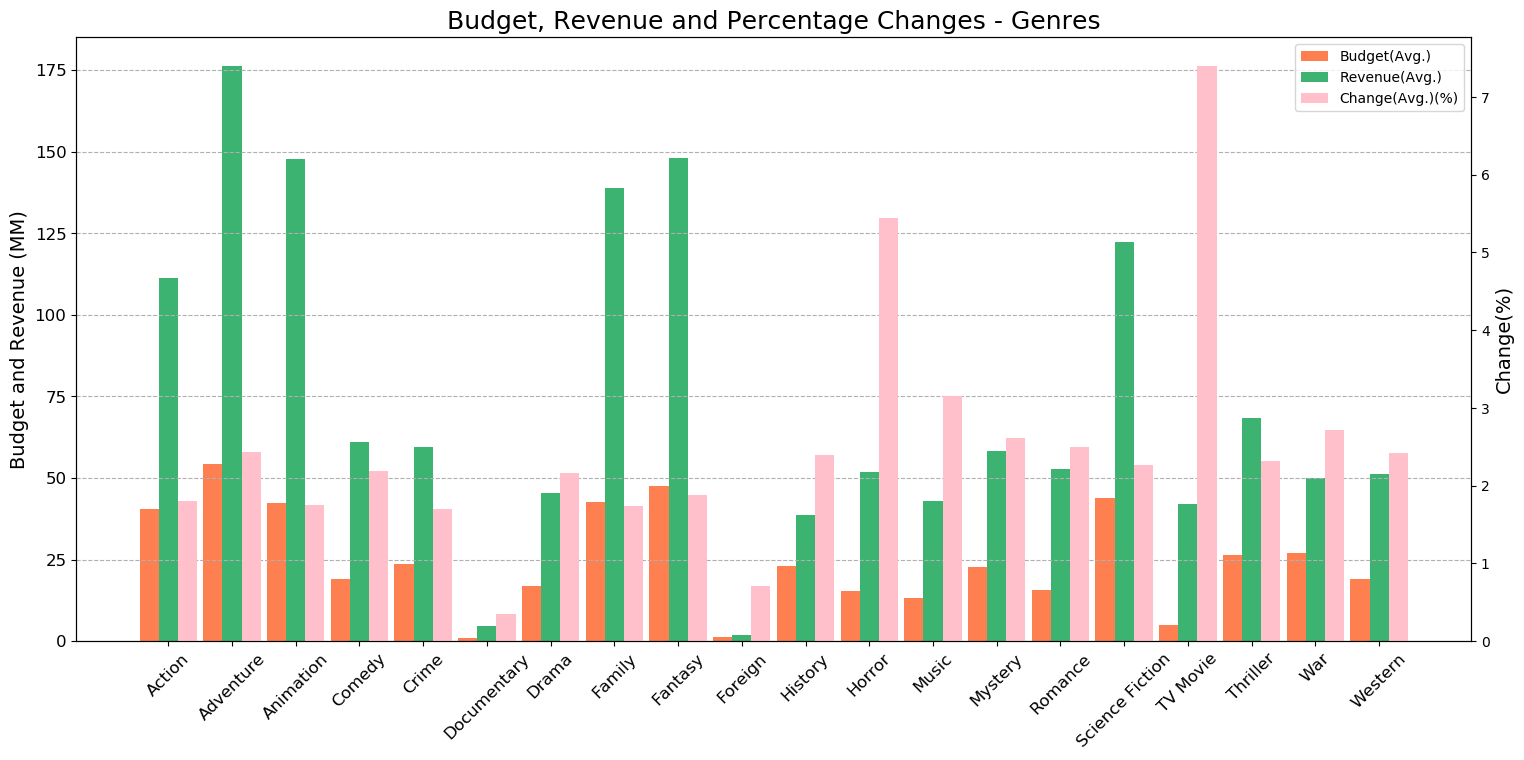

In [242]:
graph_genres_all = train_genres[["budget", "revenue", "percentage_change","genres_x", "Q_x"]].groupby(["genres_x"]).mean()

fig, axes = plt.subplots(1, 1, figsize=(18,8), sharey=True, sharex=True, dpi=100)
ind = np.arange(len(graph_genres_all)) 
width = 0.3

graph_plot(axes, graph_genres_all, "budget", "revenue", "percentage_change", graph_genres_all.index);
plt.savefig(save_path + '9_1_genres_all.jpg', format='jpg', dpi=200)

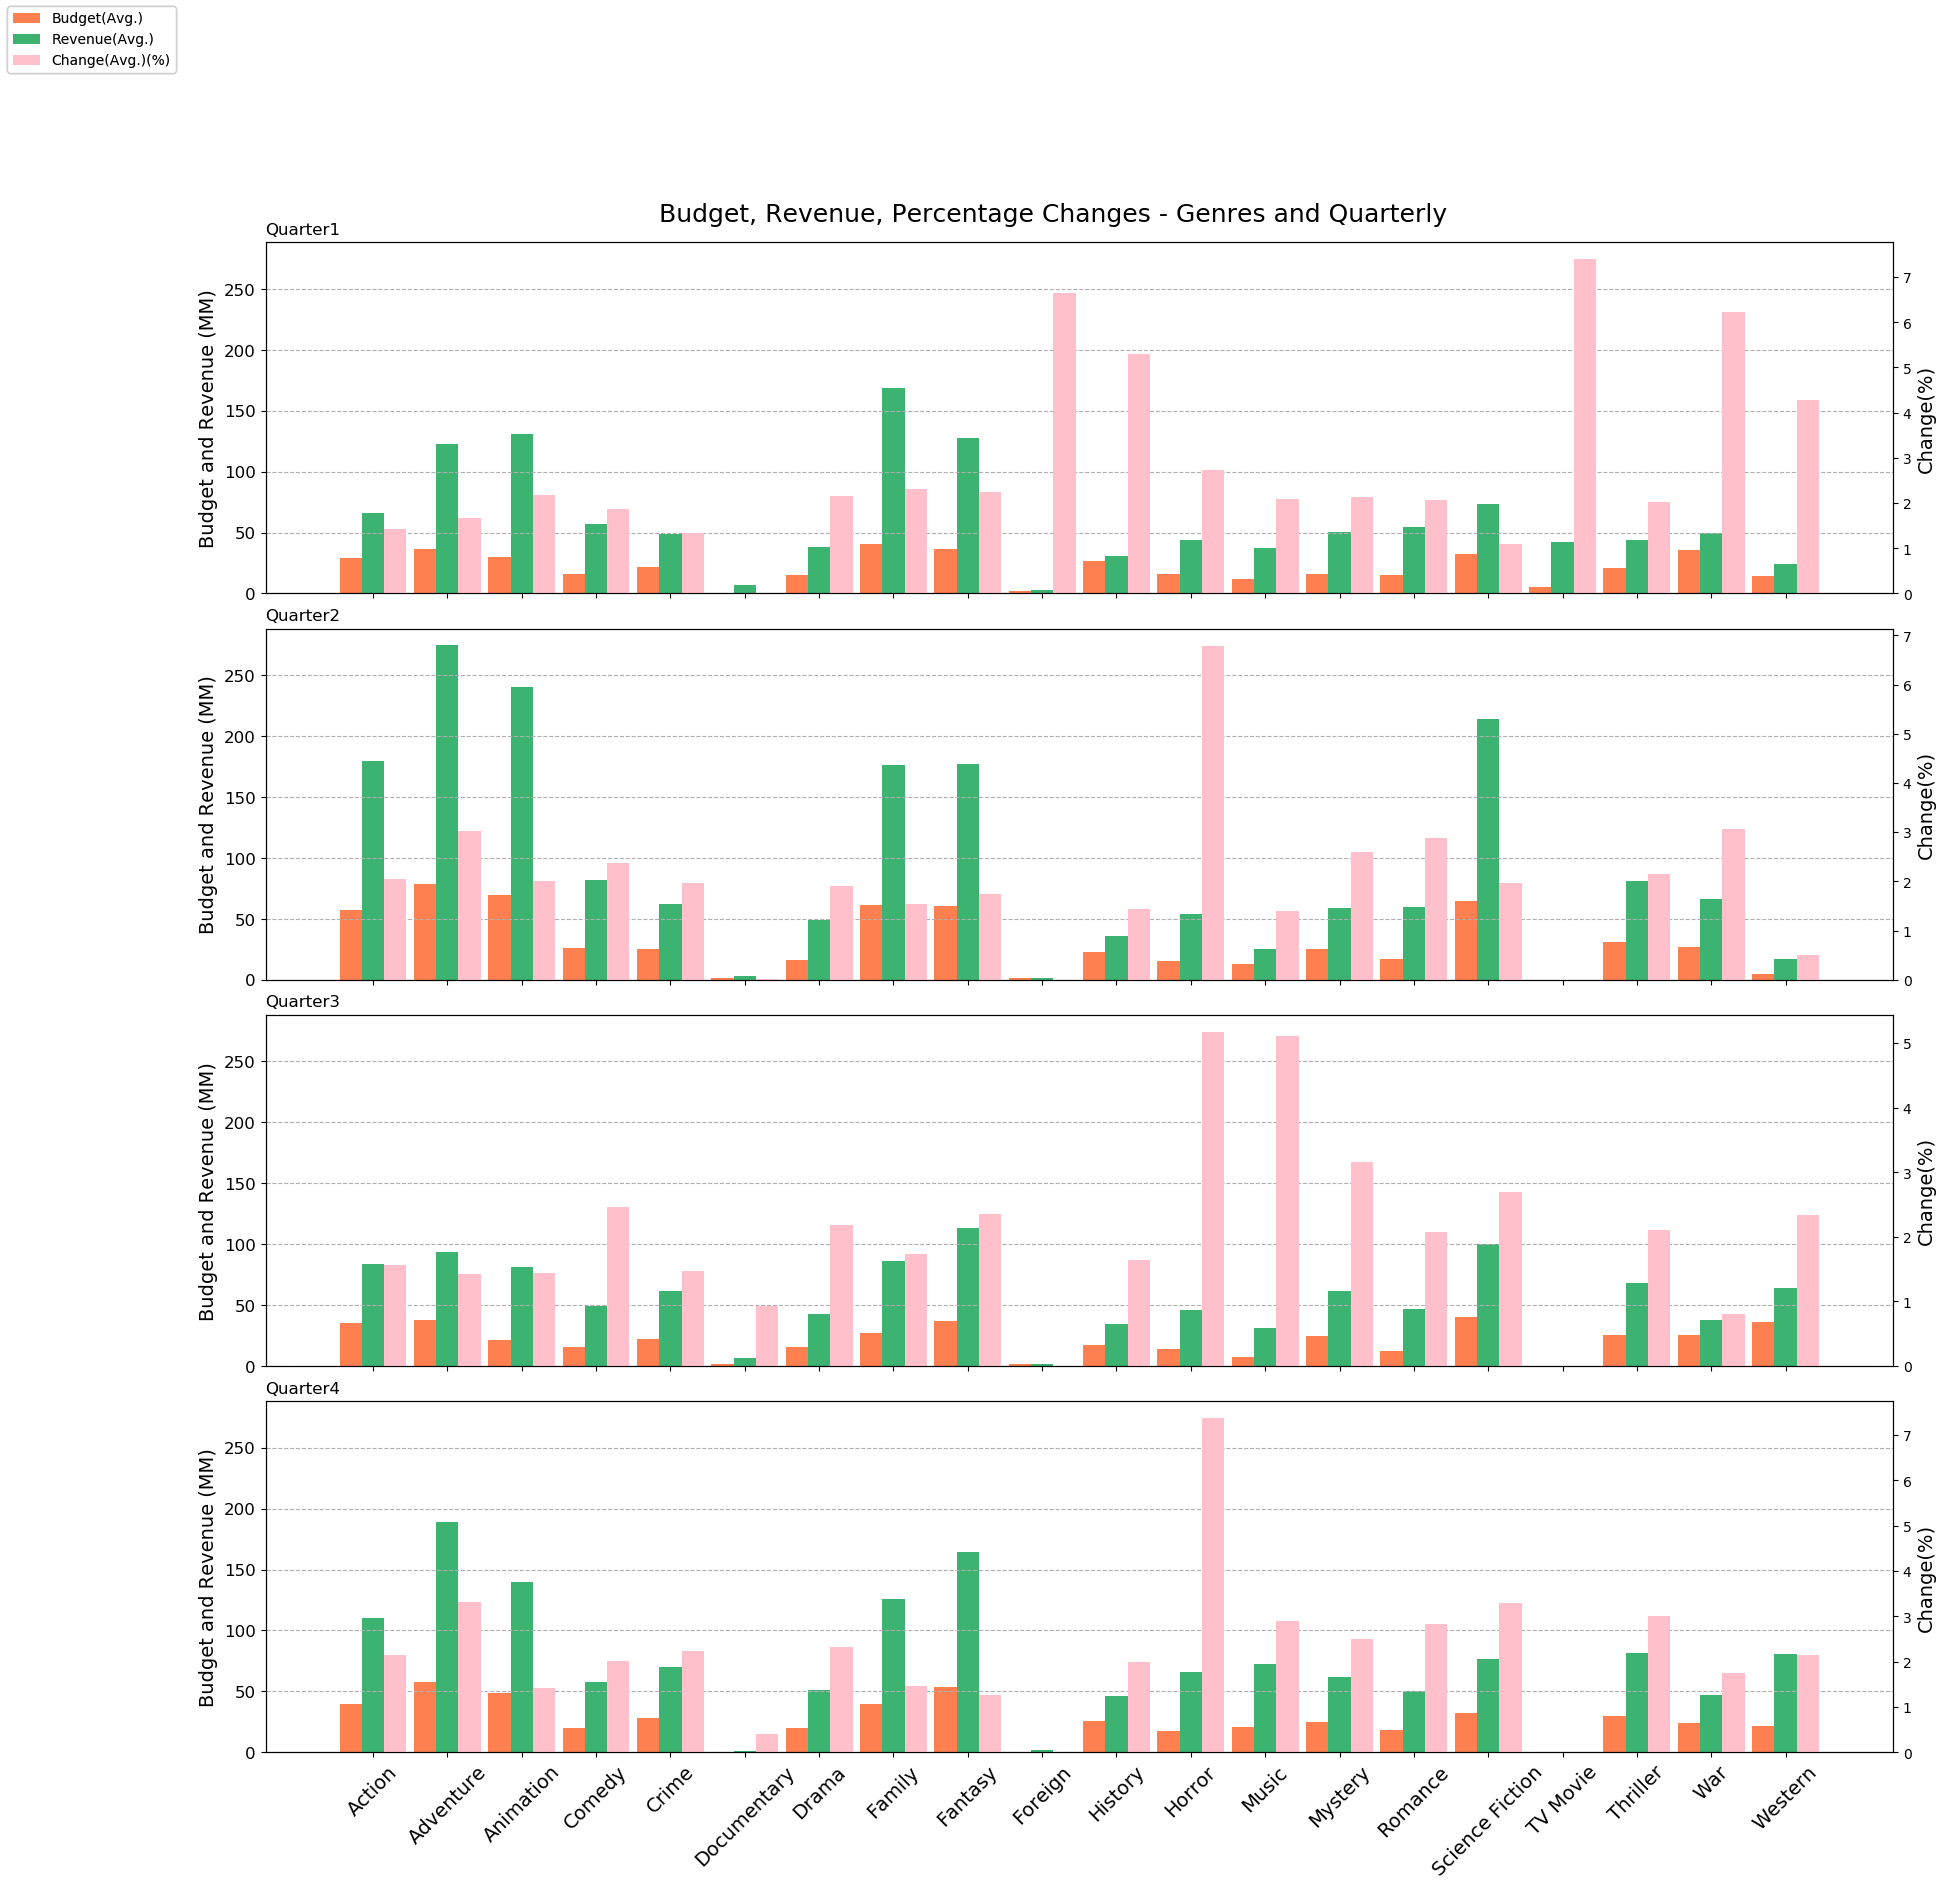

In [211]:
df_genres = pd.DataFrame(set(train_genres.genres_x), columns=["genres_x"]).set_index("genres_x").sort_index()
#fig, ax = plt.subplots(figsize=(21,10), dpi=100)
graph_genres_quarterly = train_genres[["budget", "revenue", "percentage_change","genres_x", "Q_x"]].groupby(["genres_x", "Q_x"]).mean()
graph_genres_quarterly = graph_genres_quarterly.reset_index()

fig, axes = plt.subplots(4, 1, figsize=(21,20), sharey=True, sharex=True, dpi=100)
ind = np.arange(len(graph_genres_quarterly.groupby("genres_x"))) 
width = 0.3

for i in range(0, len(graph_genres_quarterly.groupby("Q_x"))):

    graph_genres_quarterly_temp = graph_genres_quarterly.loc[graph_genres_quarterly["Q_x"] == i+1]
    #temp_graph_mean = temp_train_genres[["budget", "revenue", "percentage_change","genres_x"]].groupby(["genres_x"]).mean()
    temp_graph = pd.merge(df_genres, graph_genres_quarterly_temp, how="left", on="genres_x")
    axes[i,] = graph_plot(axes[i,], temp_graph, "budget", "revenue", "percentage_change", df_genres.index ,quarterly=True);
    
plt.savefig(save_path + '9_2_genres_quarterly.jpg', format='jpg', dpi=200)

# PRODUCTION COMPANY

In [136]:
train_production_companies = seperate_row_value(train,"production_companies", "production_companies_new", replace_production_companies)
train_production_countries = seperate_row_value(train,"production_countries", "production_countries_new", replace_production_countries)

In [137]:
df_budget_per = pd.DataFrame(train_production_companies.groupby("id")["budget"].mean() / train_production_companies.groupby("id").size()).reset_index()
df_budget_per.columns = ["id", "budget_per_company"]
df_budget_per.head()

,id,budget_per_company
0,1,"4,666,666.6666666670"
1,2,"40,000,000.0000000000"
2,3,"1,100,000.0000000000"
3,7,"7,000,000.0000000000"
4,9,0.0000000000


In [138]:
df_revenue_per = pd.DataFrame(train_production_companies.groupby("id")["revenue"].mean() / train_production_companies.groupby("id").size()).reset_index()
df_revenue_per.columns = ["id", "revenue_per_company"]
df_revenue_per.head()

,id,revenue_per_company
0,1,"4,104,883.6666666665"
1,2,"95,149,435.0000000000"
2,3,"4,364,000.0000000000"
3,7,"42,723,037.5000000000"
4,9,"11,442,463.6666666660"


In [139]:
train_production_companies = pd.merge(train_production_companies, df_budget_per, how="left", on="id").merge(df_revenue_per, how="left", on="id")
train_production_companies.head()

,level_0,production_companies_x,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies_y,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,percentage_change,release_date1,Q_x,genres_new,production_companies_new,production_countries_new,budget_per_company,revenue_per_company
0,1,Paramount Pictures,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000000000,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-0.1203820714,2015-02-20,1,Comedy,Paramount Pictures ; United Artists ; Met...,US United States of America,"4,666,666.6666666670","4,104,883.6666666665"
1,1,United Artists,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000000000,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-0.1203820714,2015-02-20,1,Comedy,Paramount Pictures ; United Artists ; Met...,US United States of America,"4,666,666.6666666670","4,104,883.6666666665"
2,1,Metro-Goldwyn-Mayer (MGM),1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000000000,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-0.1203820714,2015-02-20,1,Comedy,Paramount Pictures ; United Artists ; Met...,US United States of America,"4,666,666.6666666670","4,104,883.6666666665"
3,2,Walt Disney Pictures,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.2488950000,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0000000000,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1.3787358750,2004-08-06,3,Comedy; Drama; Family; Romance,Walt Disney Pictures,US United States of America,"40,000,000.0000000000","95,149,435.0000000000"
4,3,Bold Films,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.2999900000,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0000000000,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2.9672727273,2014-10-10,4,Drama,Bold Films ; Blumhouse Productions ; Righ...,US United States of America,"1,100,000.0000000000","4,364,000.0000000000"


In [172]:
graph_production_companies = train_production_companies[["budget_per_company", "revenue_per_company", "percentage_change","production_companies_x"]].groupby(["production_companies_x"]).sum()
graph_production_companies = graph_production_companies.loc[graph_production_companies.budget_per_company != 0]

In [173]:
graph_production_companies["company"] = "Other"

In [174]:
#1- Warner Bros. Entertainment

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Warner')) | 
                               (graph_production_companies.index.str.startswith('Turner Entertainment')) |
                               (graph_production_companies.index.str.startswith('Castle')) |
                               (graph_production_companies.index.str.startswith('New Line')) |
                               (graph_production_companies.index.str.startswith('DC ')), "company" ] = "Top10"

#2- Sony Pictures Motion Picture Group

graph_production_companies.loc[(graph_production_companies.index.str.startswith('TriStar')) | 
                               (graph_production_companies.index.str.startswith('Screen Gems')) |
                               (graph_production_companies.index.str.startswith('Sony Pictures')) |
                               (graph_production_companies.index.str.startswith('Destination Films')) |
                               (graph_production_companies.index.str.startswith('Affirm Films')), "company" ] = "Top10"

#3- Walt Disney Studios

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Lucas Film')) | 
                               (graph_production_companies.index.str.startswith('Marvel')) |
                               (graph_production_companies.index.str.startswith('Pixar')) |
                               (graph_production_companies.index.str.startswith('Disneynature')), "company" ] = "Top10"

#4- Universal Pictures

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Universal Studios Home')) |
                               (graph_production_companies.index.str.startswith('Focus Features')) |
                               (graph_production_companies.index.str.startswith('Working Title Films')), "company" ] = "Top10"

#5- 20th Century Fox

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Fox Searchlight')) | 
                               (graph_production_companies.index.str.startswith('20th')) |
                               (graph_production_companies.index.str.startswith('Fox Star')) |
                               (graph_production_companies.index.str.startswith('Zero Day')), "company" ] = "Top10"

#6- Paramount Pictures

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Paramount')) | 
                               (graph_production_companies.index.str.startswith('Nickelodeon')) |
                               (graph_production_companies.index.str.startswith('MTV')), "company" ] = "Top10"

#7- Lionsgate Films

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Lionsgate')) | 
                               (graph_production_companies.index.str.startswith('Roadside')) |
                               (graph_production_companies.index.str.startswith('Pantelion')) |
                               (graph_production_companies.index.str.startswith('Codeblack')), "company" ] = "Top10"

#8- The Weinstein Company

graph_production_companies.loc[(graph_production_companies.index.str.startswith('The Weinstein')), "company" ] = "Top10"

#9- Metro-Goldwyn-Mayer Studios

graph_production_companies.loc[(graph_production_companies.index.str.startswith('Metro-Goldwyn-Mayer')), "company" ] = "Top10"

#10- DreamWorks Pictures

graph_production_companies.loc[(graph_production_companies.index.str.startswith('DreamWorks')), "company" ] = "Top10"


In [182]:
graph_production_companies

,budget_per_company,revenue_per_company,percentage_change,company
production_companies_x,,,,
,"5,966,666.6666666670","5,039,847.6666666660",0.6703174605,Other
"""Bulls Eye Entertainment""","812,500.0000000000","12,301,257.6250000000",14.1400093846,Other
"""Centre National du Cinéma et de Limage Animée (CNC)""","235,294.1176470588","927,473.0294117647",2.9140482500,Other
"""Centre du Cinéma et de lAudiovisuel de la Fédération Wallonie-Bruxelles""","962,500.0000000000","1,610,126.6875000000",0.6728588961,Other
"""Coopers Town Productions""","1,000,000.0000000000","7,146,618.5714285718",6.0121185714,Other
"""DAntoni Productions""","600,000.0000000000","13,719,585.6666666660",21.8659761111,Other
"""DArtagnan Productions Limited""","5,000,000.0000000000","3,381,726.8750000000",-0.3236546250,Other
"""DIA"" Productions GmbH & Co. KG","9,000,000.0000000000","11,087,731.5000000000",0.2319701667,Other
"""Donners Company""","135,868,686.8686868548","442,545,111.5454545617",14.9489388507,Other


In [189]:
graph_company = graph_production_companies[["budget_per_company", "revenue_per_company","company"]].groupby(["company"]).sum()
graph_company["change"] = (graph_company["revenue_per_company"] - graph_company["budget_per_company"]) / graph_company["budget_per_company"]
graph_company

,budget_per_company,revenue_per_company,change
company,,,
Other,"54,948,463,027.1637268066","156,486,907,339.8422241211",1.8478850675
Top10,"12,315,477,101.8362197876","40,153,890,780.6136093140",2.2604413494


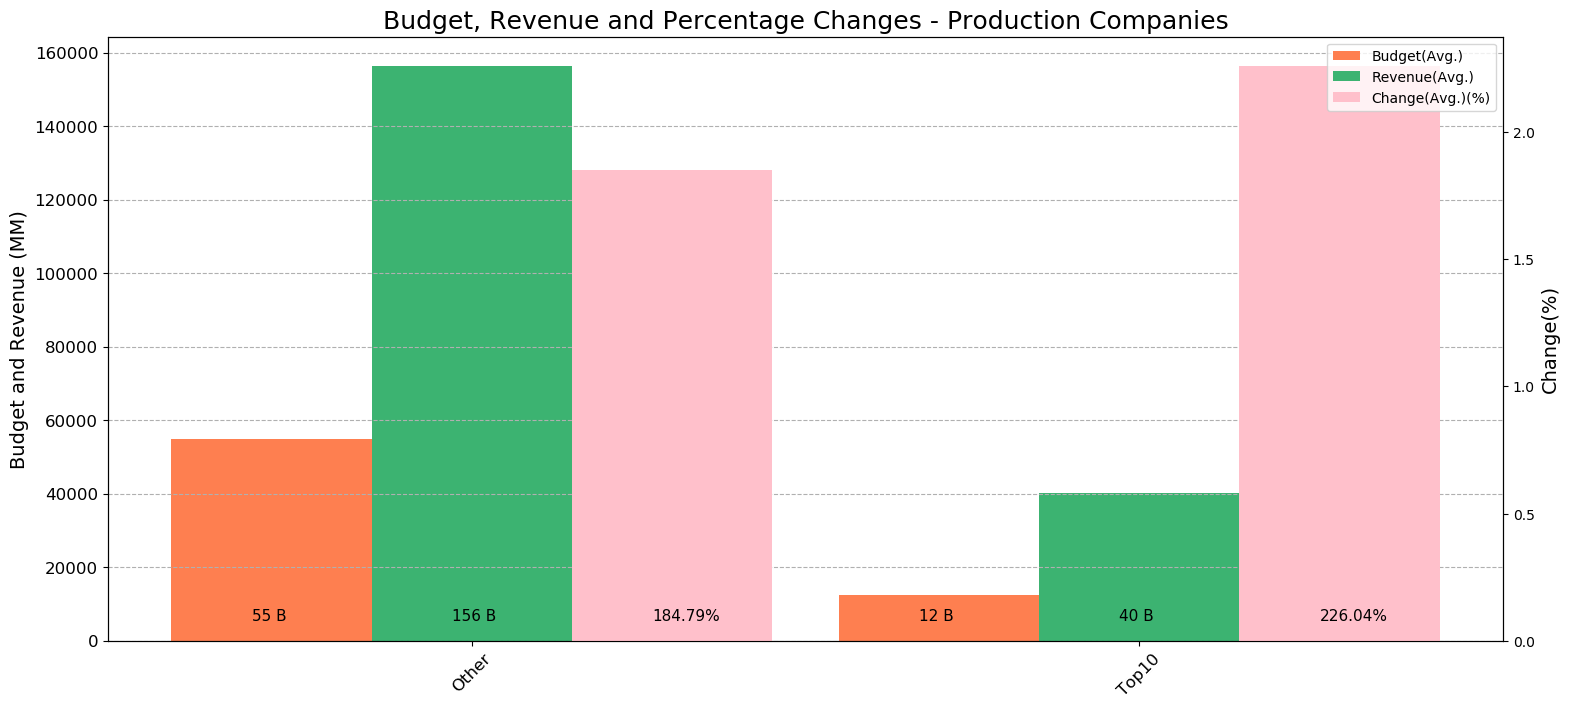

In [244]:
graph_company = graph_production_companies[["budget_per_company", "revenue_per_company","company"]].groupby(["company"]).sum()
graph_company["change"] = (graph_company["revenue_per_company"] - graph_company["budget_per_company"]) / graph_company["budget_per_company"]

fig, axes = plt.subplots(1, 1, figsize=(18,8), sharey=True, sharex=True, dpi=100)
ind = np.arange(len(graph_company)) 
width = 0.3

graph_plot(axes, graph_company, "budget_per_company", "revenue_per_company", "change", (graph_company.index), title=True);

plt.title("Budget, Revenue and Percentage Changes - Production Companies",fontsize=18)


plt.savefig(save_path + '10_company_all.jpg', format='jpg', dpi=200)

# PREDICTION

In algorithm, we use
- quarter
- genre of movie
- production companies
- budget (normalization)
- language
features.
For these features, we combine necessary dataframe.

### Getting necessary features from "train" dataset

In [293]:
train.head()
prediction_train = train[["id", "budget", "release_date1", "percentage_change", "Q_x"]]
prediction_train.head()

,id,budget,release_date1,percentage_change,Q_x
0,1,14000000,2015-02-20,-0.1203820714,1
1,2,40000000,2004-08-06,1.3787358750,3
2,3,3300000,2014-10-10,2.9672727273,4
3,4,1200000,2012-03-09,12.3333333333,1
4,5,0,2009-02-05,0.0000000000,1


### Creating "genres" dataframe

In [257]:
prediction_df_genres = train_genres[["id", "genres_x"]]
prediction_df_genres = pd.get_dummies(prediction_df_genres, prefix=['']).groupby("id").sum()
prediction_df_genres.head()

,_Action,_Adventure,_Animation,_Comedy,_Crime,_Documentary,_Drama,_Family,_Fantasy,_Foreign,_History,_Horror,_Music,_Mystery,_Romance,_Science Fiction,_TV Movie,_Thriller,_War,_Western
id,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Creating "production_companies" dataframe

In [282]:
prediction_df_production = train_production_companies[["id", "production_companies_x"]]
prediction_df_production = pd.merge(prediction_df_production, graph_production_companies.reset_index()[["production_companies_x","company"]], how="left", on="production_companies_x")
prediction_df_production = pd.get_dummies(prediction_df_production[["id", "company"]], prefix=['']).groupby("id").max()
prediction_df_production.head()

,_Other,_Top10
id,,
1,1,1
2,1,0
3,1,0
7,1,0
9,1,0


In [294]:
df_pred = pd.merge(prediction_train, prediction_df_production, how="left", on="id")#.merge(prediction_df_genres, how="left", on="id")

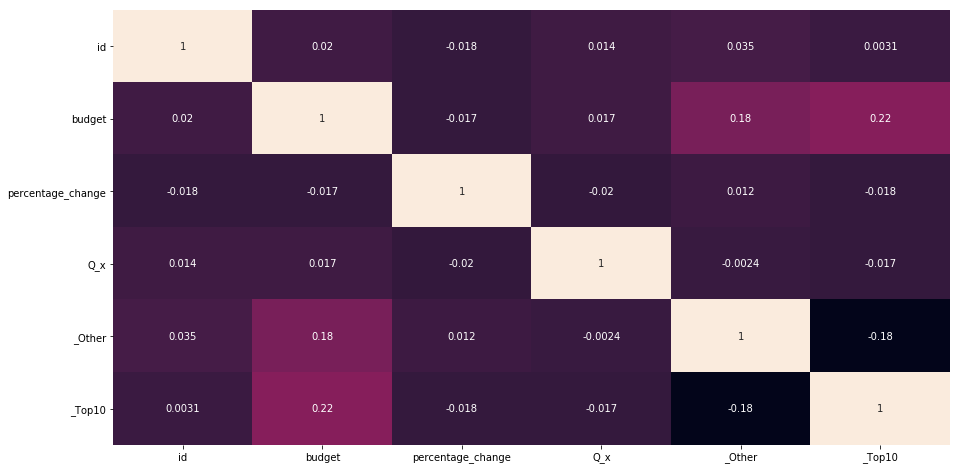

In [295]:
plt.figure(figsize=(15,8))
sns.heatmap(df_pred.corr(), annot=True, cbar=False);